<a href="https://colab.research.google.com/github/Pavel-Pyvovar/ml_iasa_2020/blob/master/ml_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практикум 4. Побудова ансамблiв моделей класифiкацiї та регресiї засобами бiблiотеки Scikit-Learn Python**
# Варіант 14

# Хід виконання роботи:
1. [Взяти данi з роботи № 2 згiдно з варiантом. Представити данi графiчно.](#1.-Взяти-данi-з-роботи-№-2-згiдно-з-варiантом.-Представити-данi-графiчно.)
2. [Побудувати модель нейронної мережі, використовуючи клас `sklearn.neural_network.MLPClassifier`.](#2.-Побудувати-модель-нейронної-мережі,-використовуючи-клас-`sklearn.neural_network.MLPClassifier`.)
3. [Виконати прогнози на основi моделей нейронних мереж.](#3-Виконати-прогнози-на-основi-моделей-нейронних-мереж.)
4. [Зробити висновки про якiсть роботи моделей нейронних мереж на дослiджених даних. В задачах класифiкацiї для кожної навчальної вибiрки вибрати найкращу модель за критерiями якостi:](#4.-Зробити-висновки-про-якiсть-роботи-моделей-нейронних-мереж-на-дослiджених-даних.-В-задачах-класифiкацiї-для-кожної-навчальної-вибiрки-вибрати-найкращу-модель-за-критерiями-якостi:)
5. [Побудувати ансамблi моделей, використовуючи наступний метод:](#5.-Побудувати-ансамблi-моделей,-використовуючи-наступний-метод:)
6. [Побудувати ансамбль Bagging на основі найпростіших моделей.](#6.-Побудувати-ансамбль-Bagging-на-основі-найпростіших-моделей.)
7. [Побудувати ансамблi на основi найкращої моделi / моделей
нейронних мереж, знайдених на попереднiх етапах даної роботи, та найкращої моделi / моделей, знайдених у роботi №2.](#7.-Побудувати-ансамблi-на-основi-найкращої-моделi-/-моделей-нейронних-мереж,-знайдених-на-попереднiх-етапах-даної-роботи,-та-найкращої-моделi-/-моделей,-знайдених-у-роботi-№2.)


# 1. Взяти данi з роботи № 2 згiдно з варiантом. Представити данi графiчно.

In [0]:
import inspect
from lab2_utils import plot_decision_boundary
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix, precision_score,\
                            recall_score, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from tqdm import tqdm
import warnings

sns.set()
%matplotlib inline
np.set_printoptions(linewidth=1000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.max_colwidth', 1000)
plt.rcParams['figure.figsize'] = [12, 8]
print = pprint
warnings.simplefilter('ignore')

In [0]:
iris = sns.load_dataset('iris')

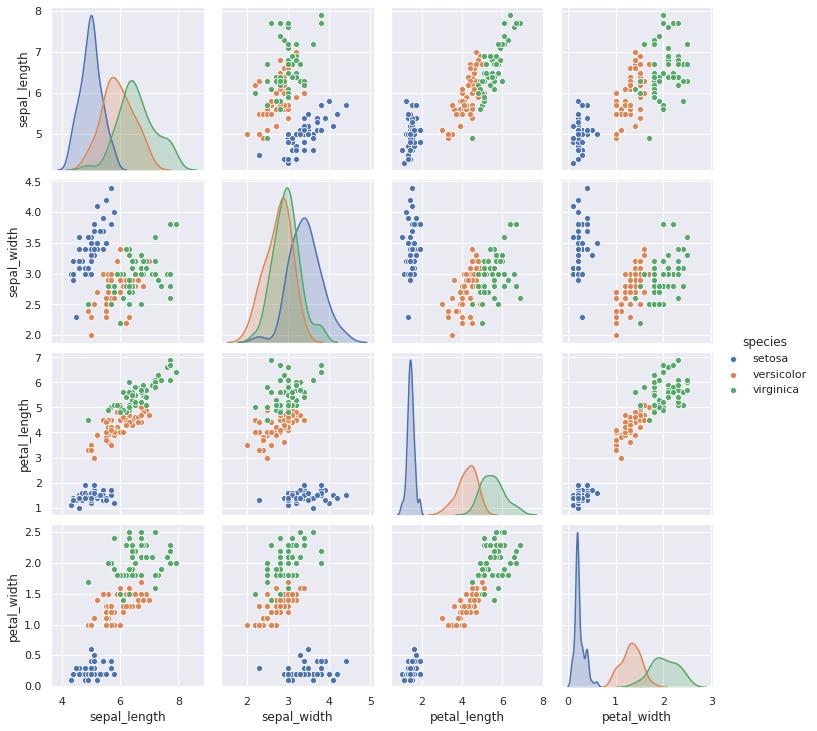

In [188]:
sns.pairplot(iris, hue='species')
plt.show()

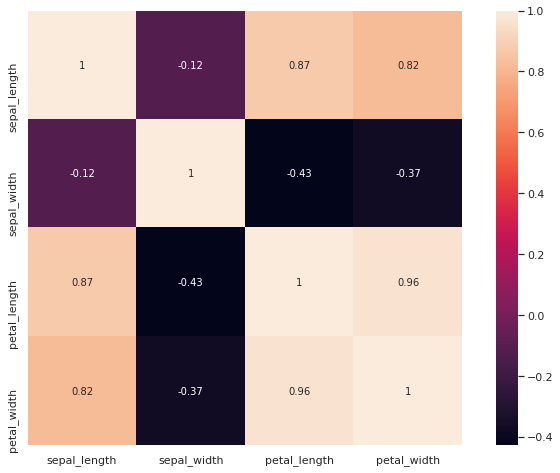

In [189]:
sns.heatmap(iris.corr(), annot=True, cbar=True, square=True)
plt.show()

In [0]:
from sklearn.datasets import make_blobs
X_gen, blob_y = make_blobs(n_samples=400, centers=4, 
                          cluster_std=.6, random_state=0)
rng = np.random.RandomState(13)
blob_X = np.dot(X_gen, rng.randn(2, 2))

## Попередня обробка даних

In [0]:
iris_y = LabelEncoder().fit_transform(iris.species)
iris_X = StandardScaler().fit_transform(iris.drop('species', axis=1))
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X,
                                                                        iris_y)

In [0]:
blob_X = StandardScaler().fit_transform(blob_X)
blob_X_train, blob_X_test, blob_y_train, blob_y_test = train_test_split(blob_X, 
                                                                        blob_y)

# 2. Побудувати модель нейронної мережі, використовуючи клас `sklearn.neural_network.MLPClassifier`.

Звернiть увагу, що багатошаровий персептрон чутливий до масштабування вхiдних даних. Данi можуть бути приведенi до дiапазону [0, 1] або [−1, +1], або приведенi до нульового середнього та одиничної дисперсiї. Той самий метод масштабування має бути застосовано до тестових даних.

Дослiдити вплив рiзних параметрiв `MLPClassifier`, на результат класифiкацiї:



* Побудувати рiзнi архiтектури нейронних мереж шляхом варiювання значень параметру `hidden_layer_sizes`. Порiвняти результати класифiкацiї, отриманi на основi рiзних архiтектур.

* Використати рiзнi методи розрахунку ваг (параметр `solver`); порiвняти результати, отриманi методами `lbfgs`, `sgd` та `adam`.


* Використати рiзнi функцiї активацiї для скритого шару; дослiдити їх вплив на результат.


* Дослiдити вплив рiзних значень параметру регуляризацiї `alpha` класу `MLPClassifier` на результат класифiкацiї.


* Дослiдити вплив рiзних методiв визначення `learning_rate` на результат класифiкацiї (для `solver='sgd'`).


* Розглянути рiзнi значення `max_iter`, дослiдити їх вплив на результат.

* Використати `early_stopping=True`.

* Використати `warm_start=True`.


* Вивести значення функцiї втрат на декiлькох перших i декiлькох останнiх iтерацiях - у кожному варiантi.


* Вивести значення середньої точностi класифiкацiї
на навчальнiй i тестовiй множинах, використовуючи `score` - у кожному варiантi.

## Пошук найкращих гіперпараметрів для класифікатора `MLPClassifier`

In [0]:
param_grid = {'hidden_layer_sizes': [50, 100, 150, 200],
            'solver': ['lbfgs', 'sgd', 'adam'],
            'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'alpha': [.0001, .001, .01, .1],
            'learning_rate': ['adaptive', 'invscaling', 'constant'],
            'max_iter': [100, 200, 300, 400, 500]}

scoring = ['f1_weighted', 'precision_weighted', 'recall_weighted',
           'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted',
           'roc_auc_ovo_weighted']

### Iris data set

In [0]:
grid_search = GridSearchCV(MLPClassifier(), param_grid, scoring='f1_weighted',
                           verbose=1, n_jobs=-1)
grid_search.fit(iris_X_train, iris_y_train)

In [0]:
cv_results = pd.DataFrame(grid_search.cv_results_,
                        columns=['params', 'rank_test_score'])\
                        .sort_values('rank_test_score')
cv_results

In [0]:
cv_results[cv_results.rank_test_score == 1].to_csv('mlp_models_iris.csv')

### Blob data set

In [104]:
grid_search = GridSearchCV(MLPClassifier(), param_grid, scoring='f1_weighted',
                           verbose=1, n_jobs=-1)
grid_search.fit(blob_X_train, blob_y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1354 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2054 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 2898 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 3784 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 4556 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 5470 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 6484 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 7534 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 8684 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 9934 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 11350 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 12932 tasks     

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [50, 100, 150, 200],
                         'lea

In [105]:
cv_results = pd.DataFrame(grid_search.cv_results_,
                        columns=['params', 'rank_test_score'])\
                        .sort_values('rank_test_score')
cv_results

,params,rank_test_score
0,"{'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': 50, 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'lbfgs'}",1
2526,"{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 50, 'learning_rate': 'adaptive', 'max_iter': 300, 'solver': 'lbfgs'}",1
984,"{'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'max_iter': 400, 'solver': 'lbfgs'}",1
2697,"{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 200, 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'lbfgs'}",1
966,"{'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'max_iter': 300, 'solver': 'lbfgs'}",1
...,...,...
832,"{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': 150, 'learning_rate': 'invscaling', 'max_iter': 300, 'solver': 'sgd'}",2876
1642,"{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 50, 'learning_rate': 'invscaling', 'max_iter': 300, 'solver': 'sgd'}",2877
2536,"{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': 50, 'learning_rate': 'invscaling', 'max_iter': 100, 'solver': 'sgd'}",2878
1996,"{'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 50, 'learning_rate': 'invscaling', 'max_iter': 100, 'solver': 'sgd'}",2879


In [0]:
cv_results[cv_results.rank_test_score == 1].to_csv('mlp_models_blob.csv')

## Дослідження впливу гіперпараметрів класифікатора `MLPClassifier` на результат класифікації

Зауваження: `param_grids` є **списком** решіток параметрів, а не одною решіткою параметрів.

In [0]:
class CustomGridSearch():
    """Implementation of grid search adopted to the goals of this lab work
    
    Parameters
    -----------
    estimator : sklearn estimator class.
    
    param_grids : list
        Contains Python dicts that have estimator's hyperparameters names as
        keys and Python list of values of that parameter as value of the dict.

    scoring -- list
        Contains methods defined in sklearn.metrics module used for evaluating
        an estimator. Possible metrics can be: confusion_matrix, f1_score,
        precision_score, roc_auc_score, recall_score.

    Attributes
    ----------
    models : list,
        Contains models trained during grid search.
    """
    
    def __init__(self, estimator, param_grids, scoring):
        self.estimator = estimator
        self.param_grids = param_grids 
        self.scoring = scoring
        self.models = []


    def fit(self, X_train, y_train):
        '''Implementation of fit method for CustomGridSearch class. Trains 
        models according to parameters provided in parameter grids and packs
        models attribute with fitted estimators.

        Parameters
        -----------        
        X_train : numpy.ndarray, shape (n_samples, n_features)
            Samples to learn from, expected to be normalized (scaled).
        y_train : numpy.ndarray, shape (n_samples, )
            Numeric labels for samples in X_train.
        '''
        for params in tqdm(self.param_grids):
            param_name = list(params.keys())[0]
            model_batch = []
            for param_value in params[param_name]:
                kwargs = {param_name: param_value}
                if param_name is 'learning_rate':
                    kwargs['solver'] = 'sgd'
                est = self.estimator(**kwargs)
                est.fit(X_train, y_train)
                model_batch.append(est)
            self.models.append({param_name: model_batch})    


    def predict(self, X_test):
        '''Make predictions using estimators in models list on testing data.

        Parameters
        -----------
        X_test : numpy.ndarray, shape (n_samples, n_features)
            Samples to test data on, expected to be normalized (scaled).  

        Returns
        -----------
        predicts : dict
            Predictions made using estimators in models. Keys are hyperparameter
            names of the estimator, strings. Values are tuples containing two 
            lists: predictions y_pred done using estimators with parameter
            values in the second list of the tuple -- param_values.
        '''
        predicts = {}
        for param_models_dict in self.models:
            param_name = list(param_models_dict.keys())[0]
            y_preds, param_values = [], []
            for model in param_models_dict[param_name]:
                y_pred = model.predict_proba(X_test)
                y_preds.append(y_pred)
                param_value = model.get_params()[param_name]
                param_values.append(param_value)
            predicts.update({param_name: (y_preds, param_values)})
        return predicts
    

    def best_conf_matr_index(self, y):
        '''Function used to compare a list of matrices by their main diagonal.
        Used for comparing multiclass classifiers by confusion matrix. The best
        confusion matrix is the one that has the maximum number of elements 
        located on the main diagonal.
        
        Parameters
        -----------
        y : list
            Contains numpy.ndarrays, sequence of confusion matrices.
        
        Returns
        -----------
        index : int
            Index of the best confusion matrix from the list y.
        '''
        best_conf_matr = list(map(lambda x: np.sum(x * np.eye(x.shape[-1])), y))
        index = np.argmax(best_conf_matr, axis=0)
        return index


    def best_score_index(self, scores, metric):
        '''Get the index of the best value (score) of the metric. Used for 
        selecting optimal parameter for the classifier.

        Parameters
        -----------
        scores : list
            Either list of floats, or numpy.ndarrays in case if metric is
            confusion_metrix.

        metric : sklearn.metrics method
            Parameter metric is an element from the scoring list.

        Returns
        -----------
        index : int
            Index of the best score from the list scores.
        ''' 
        index = 0
        if metric is confusion_matrix:
            index = self.best_conf_matr_index(scores)
        else:
            index = np.argmax(scores)
        return index
    

    def probas_to_labels(self, probas):
        '''Utility method for converting vector of probabilities into a vector
        of labels. Needed for evaluating the roc_auc_score that excepts vector
        of probabilities as input.

        Parameters
        -----------
        probas : numpy.ndarray, shape (n_samples, n_classes)
            Vector of probabilities, output of the estimator.predict_proba
            method.

        Returns
        -----------
        labels : numpy.ndarray, shape (n_samples, )
            Vector of predicted labels.
        '''
        labels = list(map(lambda x: np.argmax(x, axis=1), probas))
        return labels


    def get_index_of_best_pred(self, y_preds, y_test, metric):
        '''Get index of the best prediction. One metric is used for eveluating
        different values of one parameter. Thus there is a mapping: parameter
        value -> metric score. This method finds the index of the best score
        that is later used to select optimal parameter value.

        Parameters
        -----------
        y_preds : numpy.ndarray, shape (n_samples, n_classes)
            Vector of estimated probabilities.
        y_test : numpy.ndarray, shape (n_samples, )
            Vector of labels for testing models.
        metric : sklearn.metrics method
            Metric from the scoring list.

        Returns
        -----------        
        index : int
            Index of the best metric score.
        '''
        metrics_scores = []
        if metric is not roc_auc_score:
            y_preds = self.probas_to_labels(y_preds)
        for y_pred in y_preds:
            if 'average' in inspect.getargspec(metric).args:
                if 'multi_class' in inspect.getargspec(metric).args:
                    metrics_scores.append(metric(y_test, y_pred, 
                                                average='weighted',
                                                multi_class='ovo'))
                else:
                    metrics_scores.append(metric(y_test, y_pred, 
                                                average='weighted'))
            else:
                metrics_scores.append(metric(y_test, y_pred))
        index = self.best_score_index(metrics_scores, metric)
        return index


    def get_metrics_names(self):
        '''Utility function for getting names of metrics provided as a parameter
        to the CustomGridSearch class.
        
        Returns
        -----------
        metrics_names : list
            Contains names (strings) of metrics in scoring.
        '''
        metrics_names = []
        for metric in self.scoring:
            if 'average' in inspect.getargspec(metric).args:
                    if 'multi_class' in inspect.getargspec(metric).args:
                        metrics_names.append(f"{metric.__name__}_weighted_ovo")
                    else:
                        metrics_names.append(f"{metric.__name__}_weighted")
            else:
                metrics_names.append(metric.__name__)
        return metrics_names
                    

    def evaluate(self, X_test, y_test):
        '''Method for evaluation of the trained models. Makes predictions on the
        test data, computes matrics and organizes results in a table.

        Parameters
        -----------
        X_test : numpy.ndarray, shape (n_samples, n_features)
            Test samples to make predictions on.
        y_test : numpy.ndarray, shape (n_samples, )

        Returns
        -----------
        classification_report : pandas.DataFrame
            Table with rows as parameter names and columns as metric. The cell
            in i-th row and j-th column contains best value of i-th parameter
            according to a j-th metric. 
        '''
        table_of_results = []
        predicts = self.predict(X_test)
        for param_name in predicts:
            y_preds, param_values = predicts[param_name]
            best_params= []
            for metric in self.scoring:
                index = self.get_index_of_best_pred(y_preds, y_test, metric)
                best_params.append(param_values[index])
            table_of_results.append(best_params)
        classification_report = pd.DataFrame(table_of_results,
                                             index=list(predicts.keys()),
                                             columns=self.get_metrics_names())
        return classification_report

In [0]:
param_grids = [{'hidden_layer_sizes': [50, 100, 150, 200]},
                {'solver': ['lbfgs', 'sgd', 'adam']},
                {'activation': ['identity', 'logistic', 'tanh', 'relu']},
                {'alpha': [.0001, .001, .01, .1]},
                {'learning_rate': ['adaptive', 'invscaling', 'constant']},
                {'max_iter': [100, 200, 300, 400, 500]}]

scoring = [confusion_matrix, f1_score, precision_score,
            roc_auc_score, recall_score]

In [0]:
gs_iris = CustomGridSearch(MLPClassifier, param_grids, scoring)

In [0]:
gs_iris.fit(iris_X_train, iris_y_train)

100%|██████████| 6/6 [00:03<00:00,  1.71it/s]


In [0]:
gs_blob = CustomGridSearch(MLPClassifier, param_grids, scoring)

In [120]:
gs_blob.fit(blob_X_train, blob_y_train)

100%|██████████| 6/6 [00:06<00:00,  1.12s/it]


## Early stopping

In [0]:
mlp = MLPClassifier()
mlp.fit(iris_X_train, iris_y_train)
mlp.n_iter_

200

In [0]:
mlp = MLPClassifier(early_stopping=True)
mlp.fit(iris_X_train, iris_y_train)
mlp.n_iter_

47

## Warm start

In [0]:
iris_X_train_, iris_X_val, iris_y_train_, iris_y_val = train_test_split(iris_X_train, iris_y_train)

In [0]:
mlp = MLPClassifier()
mlp.fit(iris_X_train_, iris_y_train_)
print(mlp.score(iris_X_val, iris_y_val))
mlp.fit(iris_X_val, iris_y_val)
mlp.score(iris_X_test, iris_y_test)

0.9285714285714286


0.9736842105263158

In [0]:
mlp = MLPClassifier(warm_start=True)
mlp.fit(iris_X_train_, iris_y_train_)
print(mlp.score(iris_X_val, iris_y_val))
mlp.fit(iris_X_val, iris_y_val)
mlp.score(iris_X_test, iris_y_test)

0.9285714285714286


0.9736842105263158

In [0]:
models = np.ravel(models)
train_scores = list(map(lambda model: model.score(iris_X_train, iris_y_train), models))
pd.DataFrame(models, columns=['models'], index=train_scores)

In [0]:
test_scores = list(map(lambda model: model.score(iris_X_test, iris_y_test), models))
pd.DataFrame(models, columns=['models'], index=test_scores)

# 3. Виконати прогнози на основi моделей нейронних мереж.

In [0]:
gs_iris.predict(iris_X_test)

In [116]:
gs_blob.predict(blob_X_test)

{'activation': ([array([[1.64755676e-02, 9.80665114e-01, 2.84830202e-03, 1.10163954e-05],
          [8.27036069e-01, 1.60554902e-02, 4.45386274e-03, 1.52454578e-01],
          [9.87829349e-01, 9.34653466e-03, 1.46988569e-06, 2.82264631e-03],
          [9.39283573e-01, 4.91793595e-02, 2.49746573e-04, 1.12873205e-02],
          [3.16805200e-03, 4.58237613e-03, 9.85975634e-01, 6.27393821e-03],
          [2.24487574e-02, 9.76379331e-01, 1.16199421e-03, 9.91731018e-06],
          [6.34263338e-02, 9.36351099e-01, 2.07244976e-04, 1.53219627e-05],
          [8.36888648e-03, 6.52421449e-06, 1.35239461e-02, 9.78100643e-01],
          [6.66714071e-02, 9.33289525e-01, 3.34798579e-05, 5.58783517e-06],
          [4.75530268e-03, 9.87149528e-01, 8.09143674e-03, 3.73299766e-06],
          [6.35807258e-07, 6.54632957e-06, 9.99962676e-01, 3.01419519e-05],
          [4.77055053e-03, 6.39430036e-07, 1.19407576e-03, 9.94034734e-01],
          [1.46209299e-03, 9.98431756e-01, 1.06094006e-04, 5.67409572e-08]

# 4. Зробити висновки про якiсть роботи моделей нейронних мереж на дослiджених даних. В задачах класифiкацiї для кожної навчальної вибiрки вибрати найкращу модель за критерiями якостi:

* матриця неточностей (confusion matrix),
* точнiсть (precision),
* повнота (recall),
* мiра F1 (F1 score),
* ROC-крива, показник AUC.

In [0]:
gs_iris.evaluate(iris_X_test, iris_y_test)

,confusion_matrix,f1_score_weighted,precision_score_weighted,roc_auc_score_weighted_ovo,recall_score_weighted
hidden_layer_sizes,50,50,50,100,50
solver,lbfgs,sgd,lbfgs,lbfgs,lbfgs
activation,tanh,tanh,tanh,identity,tanh
alpha,0.01,0.01,0.01,0.01,0.01
learning_rate,constant,constant,constant,constant,constant
max_iter,100,100,100,400,100


Як видно із талиці вище деякі зі значень за замовчуванням гіперпараметрів класифікатора `MLPClassifier` для набору даних iris були скоректовані:
*  Майже для всіх метрик оптимальним значенням кількості вузлів `hidden_layer_sizes` у прихованому шарі є 50, що меньше за значення за замовчуванням -- 100. Отже кращі результати на тестових даних давали моделі з простішою архітектурою, тобто з меншою кількістю нейронів.
* За більшістю метрик найкращою функцією активації виявився гіперболічний тангенс (tanh), хоча вважається, що функція ReLU є кращою.
* Значення параметру регуляризації `alpha` є більшим за значення за замовчуванням, що свідчить про пониження рівня регуляризації. Цей факт узгоджується з фактом зменшення кількості нейронів згаданий вище, адже чим простіша модель, тим менше ефект перенавчання, а тому і менша необхідність у регуляризації. 
* Параметр `learning_rate` впливає лише на швидкість навчання моделі, а отже не впливав на значння метрик, саме тому його значення залишилось незмінним від значення за замовчуванням.
* Параметр `max_iter` визначає максимальну кількість ітерацій, що модель може навчатись. Значення параметру нижче ніж значення за замовчуванням, що свідчить про те, що було відібрано моделі, які швидше досягали оптимуму.

In [121]:
gs_blob.evaluate(blob_X_test, blob_y_test)

,confusion_matrix,f1_score_weighted,precision_score_weighted,roc_auc_score_weighted_ovo,recall_score_weighted
hidden_layer_sizes,50,50,50,50,50
solver,lbfgs,adam,adam,lbfgs,lbfgs
activation,identity,identity,identity,identity,identity
alpha,0.0001,0.0001,0.0001,0.0001,0.0001
learning_rate,adaptive,adaptive,adaptive,constant,adaptive
max_iter,200,200,200,200,200


Для другого набору даних результати є аналогічними.

# 5. Побудувати ансамблi моделей, використовуючи наступний метод:

`BaggingClassifier`. Розглянути рiзнi значення параметрiв `max_samples` та
`bootstrap`.

In [0]:
clf = BaggingClassifier(base_estimator=MLPClassifier())
param_grid = {'max_samples': np.arange(.0, 1.1, .1), 'bootstrap': [True, False]}
scoring = ['f1_weighted', 'roc_auc_ovr_weighted']
grid_search = GridSearchCV(clf, param_grid, scoring, refit='f1_weighted')
grid_search.fit(iris_X_train, iris_y_train)

In [0]:
pd.DataFrame(grid_search.cv_results_,
             columns=['params', 'rank_test_f1_weighted',
                      'rank_test_roc_auc_ovr_weighted'])\
             .sort_values('rank_test_f1_weighted')

,params,rank_test_f1_weighted,rank_test_roc_auc_ovr_weighted
10,"{'bootstrap': True, 'max_samples': 1.0}",1,4
19,"{'bootstrap': False, 'max_samples': 0.8}",1,11
17,"{'bootstrap': False, 'max_samples': 0.6000000000000001}",1,4
16,"{'bootstrap': False, 'max_samples': 0.5}",1,4
20,"{'bootstrap': False, 'max_samples': 0.9}",1,4
9,"{'bootstrap': True, 'max_samples': 0.9}",1,3
8,"{'bootstrap': True, 'max_samples': 0.8}",1,8
21,"{'bootstrap': False, 'max_samples': 1.0}",1,2
6,"{'bootstrap': True, 'max_samples': 0.6000000000000001}",1,11
5,"{'bootstrap': True, 'max_samples': 0.5}",1,15


# 6. Побудувати ансамбль Bagging на основі найпростіших моделей.


* Дослiдити ансамблi, якi включають моделi нейронних мереж та моделi на основi методу опорних векторiв, отриманi в роботi №2. Порiвняти значення мiр F1_score та AUC та окремих моделей, якi утворюють ансамбль
(модель `base_estimator` / моделi `estimators`). Порiвняти декiлька ансамблiв, якi утворенi на основi одних estimators i вiдрiзняються значеннями параметрiв.
* Побудувати графiки залежностi значень помилок класифiкацiї
`accuracy_score` або `zero_one_loss` вiд значення `n_estimators` для дослiджених ансамблiв та окремих моделей на однiй координатнiй вiсi.
* Побудувати графiки залежностi значень мiри F1_score вiд значення n_estimators для дослiджених ансамблiв та окремих моделей на однiй координатнiй вiсi. Аналогiчнi графiки побудувати для AUC. Графiки для окремих моделей, очевидно,
 будуть горизонтальними прямими.
* В задачах класифiкацiї вiдобразити границi рiшень decision
boundaries на основi `base_estimator` / `estimators` та на основi
дослiджених ансамблiв.

## Support Vector Machine Classifier

### Iris data set

In [21]:
svm = SVC(probability=True)
svm.fit(iris_X_train, iris_y_train)
iris_svm_y_pred = svm.predict(iris_X_test)
f1_score(iris_y_test, iris_svm_y_pred, average='weighted')

0.9473684210526315

In [22]:
y_pred = svm.predict_proba(iris_X_test)
roc_auc_score(iris_y_test, y_pred, average='weighted', multi_class='ovo')

0.993421052631579

In [23]:
svm_ensemble = BaggingClassifier(SVC())
svm_ensemble.fit(iris_X_train, iris_y_train)
iris_svm_ensemble_y_pred = svm_ensemble.predict(iris_X_test)
f1_score(iris_y_test, iris_svm_ensemble_y_pred, average='weighted')

0.9473684210526315

In [24]:
y_pred = svm_ensemble.predict_proba(iris_X_test)
roc_auc_score(iris_y_test, y_pred, average='weighted', multi_class='ovo')

0.975328947368421

### Blob data set

In [122]:
svm = SVC(probability=True)
svm.fit(blob_X_train, blob_y_train)
blob_svm_y_pred = svm.predict(blob_X_test)
f1_score(blob_y_test, blob_svm_y_pred, average='weighted')

0.9899574138598528

In [124]:
y_pred = svm.predict_proba(blob_X_test)
roc_auc_score(blob_y_test, y_pred, average='weighted', multi_class='ovo')

1.0

In [125]:
svm_ensemble = BaggingClassifier(SVC())
svm_ensemble.fit(blob_X_train, blob_y_train)
blob_svm_ensemble_y_pred = svm_ensemble.predict(blob_X_test)
f1_score(blob_y_test, blob_svm_ensemble_y_pred, average='weighted')

1.0

In [126]:
y_pred = svm_ensemble.predict_proba(blob_X_test)
roc_auc_score(blob_y_test, y_pred, average='weighted', multi_class='ovo')

1.0

## Multilayer Perceptron Classifier

### Iris data set

In [33]:
mlp = MLPClassifier()
mlp.fit(iris_X_train, iris_y_train)
iris_mlp_y_pred = mlp.predict(iris_X_test)
f1_score(iris_y_test, iris_mlp_y_pred, average='weighted')

0.8947368421052632

In [34]:
y_pred = mlp.predict_proba(iris_X_test)
roc_auc_score(iris_y_test, y_pred, average='weighted', multi_class='ovo')

0.9890350877192983

In [35]:
mlp_ensemble = BaggingClassifier(MLPClassifier())
mlp_ensemble.fit(iris_X_train, iris_y_train)
iris_mlp_ensemble_y_pred = mlp_ensemble.predict(iris_X_test)
f1_score(iris_y_test, iris_mlp_ensemble_y_pred, average='weighted')

0.8947368421052632

In [36]:
y_pred = mlp_ensemble.predict_proba(iris_X_test)
roc_auc_score(iris_y_test, y_pred, average='weighted', multi_class='ovo')

0.9813596491228069

### Blob data set

In [127]:
mlp = MLPClassifier()
mlp.fit(blob_X_train, blob_y_train)
blob_mlp_y_pred = mlp.predict(blob_X_test)
f1_score(blob_y_test, blob_mlp_y_pred, average='weighted')

0.9899723884031293

In [128]:
y_pred = mlp.predict_proba(blob_X_test)
roc_auc_score(blob_y_test, y_pred, average='weighted', multi_class='ovo')

1.0

In [129]:
mlp_ensemble = BaggingClassifier(MLPClassifier())
mlp_ensemble.fit(blob_X_train, blob_y_train)
blob_mlp_ensemble_y_pred = mlp_ensemble.predict(blob_X_test)
f1_score(blob_y_test, blob_mlp_ensemble_y_pred, average='weighted')

0.9899723884031293

In [130]:
y_pred = mlp_ensemble.predict_proba(blob_X_test)
roc_auc_score(blob_y_test, y_pred, average='weighted', multi_class='ovo')

1.0

## Plot `accuracy_score` against `n_estimators` 

In [0]:
def plot_accuracy_vs_n_estimators(clf, data_set, n_estimators=21):
    '''Utility function for plotting accuracy versus number of estimators in
    BaggingClassifier ensemble. First trains ensembles with different number of
    estimators, then makes predictions, and finally evaluates accuracy score 
    that is later used for plotting.

    Parameters
    -----------
    clf : sklearn estimator
        It can be sklearn.svm.SVC or sklearn.neural_networks.MLPClassifier.
    data_set : tuple
        Contains four numpy.ndarrays, training and testing data with labels.
    n_estimators : int, optional (default=21)
        The number of estimators to use in ensemble.
    '''
    X_train, X_test, y_train, y_test = data_set
    scores = []
    for n in tqdm(range(1, n_estimators)):
        ensemble = BaggingClassifier(clf(), n_estimators=n)
        ensemble.fit(X_train, y_train)
        y_pred = ensemble.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    plt.plot(list(range(1, n_estimators)), scores)
    plt.xlabel('Number of estimators')
    plt.ylabel('Accuracy score')
    plt.show()

100%|██████████| 20/20 [00:28<00:00,  1.43s/it]


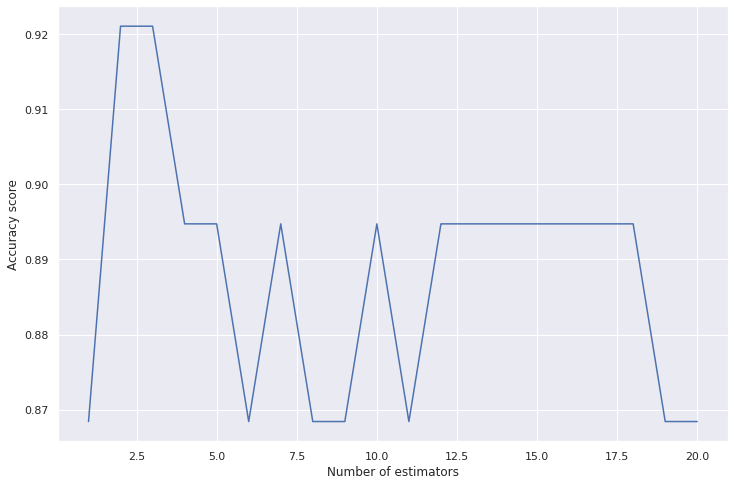

In [66]:
plot_accuracy_vs_n_estimators(MLPClassifier,
                        (iris_X_train, iris_X_test, iris_y_train, iris_y_test))

100%|██████████| 20/20 [00:58<00:00,  2.91s/it]


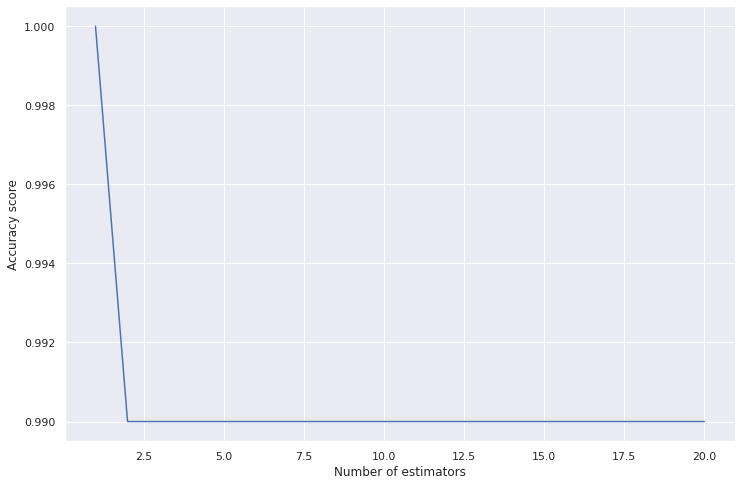

In [133]:
plot_accuracy_vs_n_estimators(MLPClassifier,
                        (blob_X_train, blob_X_test, blob_y_train, blob_y_test))

## Plot Decision Boundary

### Dicision Boundary for Multilayer Perceptron

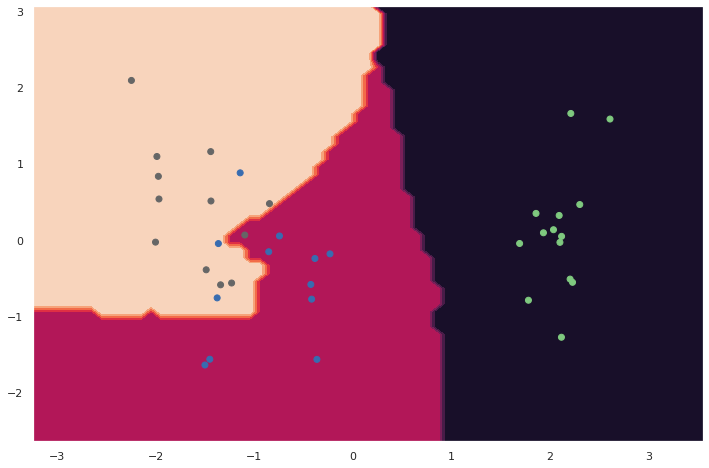

In [42]:
plot_decision_boundary(iris_X_test, iris_mlp_y_pred)

### Decision Boundary for Ensemble of Multilayer Perceptron Classifiers

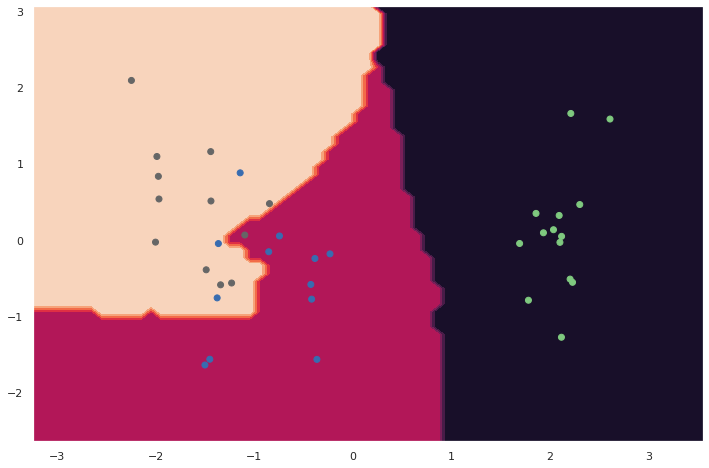

In [43]:
plot_decision_boundary(iris_X_test, iris_mlp_ensemble_y_pred)

### Decision Boundary for Support Vector Machine Classifier

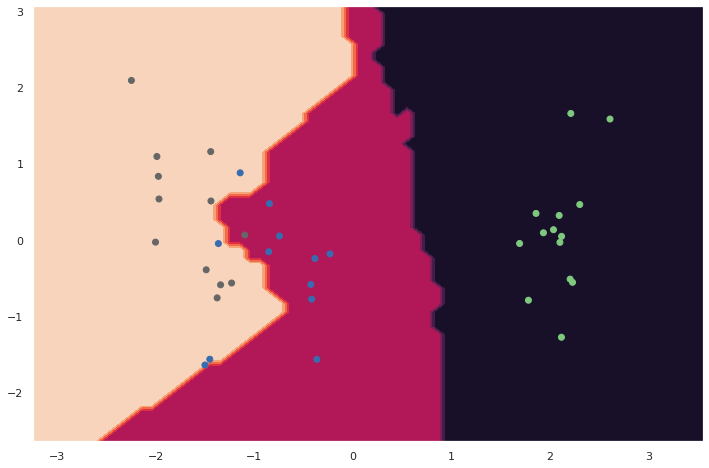

In [46]:
plot_decision_boundary(iris_X_test, iris_svm_y_pred)

### Plot Decision Boundary for an Ensemple of Support Vector Machine Classifiers

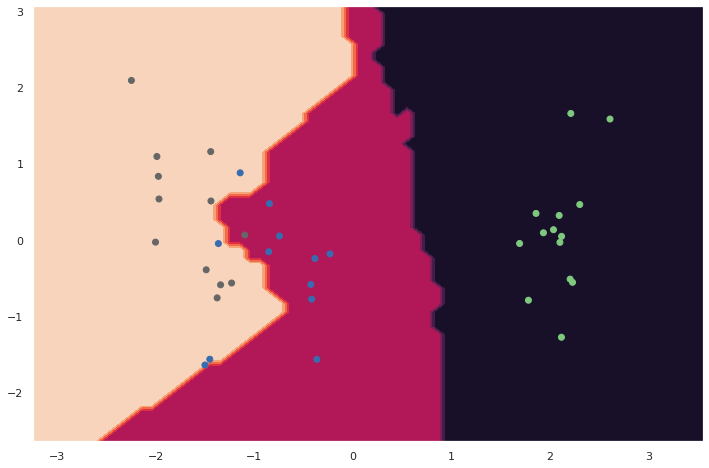

In [45]:
plot_decision_boundary(iris_X_test, iris_svm_ensemble_y_pred)

# 7. Побудувати ансамблi на основi найкращої моделi / моделей нейронних мереж, знайдених на попереднiх етапах даної роботи, та найкращої моделi / моделей, знайдених у роботi №2.

Порiвняти результати класифiкацiї, значення мiр F1_score та AUC для
ансамблiв та окремих моделей, якi утворюють цi ансамблi.

In [0]:
class AveragingEnsemble():
    '''Bagging ensembling method, averages results of estimators.

    Parameters
    ----------
    models : list
        Sequence of classifiers to be trained.
    '''

    def __init__(self, models):
        self.models = models

    
    def fit(self, X_train, y_train):
        '''Train models using input data.

        Parameters
        ----------
        X_train : numpy.ndarray, shape (n_samples, n_features)
            Training examples to learn from.
        y_train : numpy.ndarray, shape (n_samples, )
            Labels for training examples.
        '''
        for clf in tqdm(self.models):
            clf.fit(X_train, y_train)


    def predict(self, X_test):
        '''Make predictions using trained models.

        Parameters
        ----------
        X_test : numpy.ndarray, shape (n_samples, n_features)
            Testing examples for predicting labels.

        Returns
        -------
        y_pred : numpy.ndarray, shape (n_samples, )
            Vector of predictions, average of predictions of ensemple 
            classifiers.
        '''
        predicts = list(map(lambda x: x.predict(X_test), self.models))
        y_pred = np.mean(predicts, axis=0, dtype=int)
        return y_pred


    def predict_proba(self, X_test):
        '''Get probabilities that an example belongs to a given class. 

        Parameters
        ----------
        X_test : numpy.ndarray, shape (n_samples, n_features)
            Testing examples for predicting labels.

        Returns
        -------
        proba : numpy.ndarray, shape (n_samples, n_classes)
            Matrix of predictions, average of predictions of ensemple 
            classifiers.
        '''
        probas = list(map(lambda x: x.predict_proba(X_test), self.models))
        proba = np.mean(probas, axis=0) 
        return proba

In [0]:
def string_to_dict(string):
    patches = string.split(', ')
    patches[0] = patches[0].lstrip('{')
    patches[-1] = patches[-1].rstrip('}')
    dictionary = {}
    for key, value in list(map(lambda x: x.split(': '), patches)):
        key = key.replace("'", '')
        if value.endswith("'"):
            value = value.replace("'", '')
        elif '.' in value:
            value = float(value)
        else:
            value = int(value)
        dictionary.update({key: value})
    return dictionary

## Multilayer Perceptron Classifier

### Iris data set

In [0]:
models_params = pd.read_csv('mlp_models_iris.csv', usecols=['params'])\
                .params.to_list()

In [0]:
models_params = list(map(lambda x: string_to_dict(x), models_params))

In [0]:
models = list(map(lambda kwargs: MLPClassifier(**kwargs), models_params))

In [0]:
avg_ensemble = AveragingEnsemble(models)

In [148]:
avg_ensemble.fit(iris_X_train, iris_y_train)

100%|██████████| 129/129 [00:24<00:00,  5.24it/s]


In [0]:
y_pred = avg_ensemble.predict(iris_X_test)

In [150]:
f1_score(iris_y_test, y_pred, average='weighted')

0.9470003680529997

In [0]:
probas = avg_ensemble.predict_proba(iris_X_test)

In [152]:
roc_auc_score(iris_y_test, probas, average='weighted', multi_class='ovo')

0.9956140350877194

Для окремої моделі результати будуть наступними:

In [59]:
mlp = MLPClassifier()
mlp.fit(iris_X_train, iris_y_train)
y_pred = mlp.predict(iris_X_test)
f1_score(iris_y_test, y_pred, average='weighted')

0.9209153318077803

In [60]:
probas = mlp.predict_proba(iris_X_test)
roc_auc_score(iris_y_test, probas, average='weighted', multi_class='ovo')

0.9901315789473684

### Blob data set

In [0]:
models_params = pd.read_csv('mlp_models_blob.csv', usecols=['params'])\
                .params.to_list()

In [0]:
models_params = list(map(lambda x: string_to_dict(x), models_params))

In [0]:
models = list(map(lambda kwargs: MLPClassifier(**kwargs), models_params))

In [0]:
avg_ensemble = AveragingEnsemble(models)

In [171]:
avg_ensemble.fit(blob_X_train, blob_y_train)

100%|██████████| 12/12 [00:00<00:00, 27.39it/s]


In [0]:
y_pred = avg_ensemble.predict(blob_X_test)

In [174]:
f1_score(blob_y_test, y_pred, average='weighted')

0.9899723884031293

In [0]:
probas = avg_ensemble.predict_proba(blob_X_test)

In [176]:
roc_auc_score(blob_y_test, probas, average='weighted', multi_class='ovo')

1.0

Для окремої моделі результати будуть наступними:

In [177]:
mlp = MLPClassifier()
mlp.fit(blob_X_train, blob_y_train)
y_pred = mlp.predict(blob_X_test)
f1_score(blob_y_test, y_pred, average='weighted')

0.9899723884031293

In [178]:
probas = mlp.predict_proba(blob_X_test)
roc_auc_score(blob_y_test, probas, average='weighted', multi_class='ovo')

1.0

## Support Vector Machine Classifier

### Iris data set

In [0]:
models_params = pd.read_csv('svm_models_iris.csv', usecols=['params']).params.to_list()

In [0]:
models_params = list(map(lambda x: string_to_dict(x), models_params))

In [0]:
models = list(map(lambda kwargs: SVC(**kwargs, probability=True), models_params))

In [0]:
avg_ensemble = AveragingEnsemble(models)

In [0]:
avg_ensemble.fit(iris_X_train, iris_y_train)

100%|██████████| 1/1 [00:00<00:00, 66.76it/s]


In [0]:
y_pred = avg_ensemble.predict(iris_X_test)

In [0]:
f1_score(iris_y_test, y_pred, average='weighted')

0.9473684210526315

In [0]:
probas = avg_ensemble.predict_proba(iris_X_test)

In [0]:
roc_auc_score(iris_y_test, probas, average='weighted', multi_class='ovo')

0.9676065162907268

### Blob data set

In [0]:
models_params = pd.read_csv('svm_models_blob.csv', usecols=['params'])\
                    .params.to_list()

In [0]:
models_params = list(map(lambda x: string_to_dict(x), models_params))

In [0]:
models = list(map(lambda kwargs: SVC(**kwargs, probability=True), models_params))

In [0]:
avg_ensemble = AveragingEnsemble(models)

In [183]:
avg_ensemble.fit(blob_X_train, blob_y_train)

100%|██████████| 6/6 [00:00<00:00, 328.47it/s]


In [0]:
y_pred = avg_ensemble.predict(blob_X_test)

In [185]:
f1_score(blob_y_test, y_pred, average='weighted')

1.0

In [0]:
probas = avg_ensemble.predict_proba(blob_X_test)

In [187]:
roc_auc_score(blob_y_test, probas, average='weighted', multi_class='ovo')

1.0